## Homework_2023_05_15 时间序列 & 神经网络基础   
教师：胡俊峰

助教：谷东润 陈福康

本次作业总分为13分，达到10分即为满分，另外3分是附加分

注意：为提高大家的知识理解与应用能力，时间序列部分需要你自行发挥的内容较多，这些部分在评分时将不会有硬性的步骤要求，而是根据你完成的质量和分析的质量来综合给分（事实上，整体理解与综合分析能力在时间序列问题中是尤为重要的），不必过于纠结某一具体细节是否在评分标准内，加油！


## 第零部分：请认真阅读代码，理解代码的功能

卡尔曼滤波

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
font = {'family': 'SimSun',
        'size': '10.5' 
        }
plt.rc('font', **font)
plt.rc('axes', unicode_minus=False)
 
 
class Kf_Params:
    B = 0  # 外部输入为0
    u = 0  # 外部输入为0
    K = float('nan')  # 卡尔曼增益无需初始化
    z = float('nan')  # 这里无需初始化，每次使用kf_update之前需要输入观察值z
    P = np.diag(np.ones(4))  # 初始P设为0 
 
    # 初始状态：函数外部提供初始化的状态，本例使用观察值进行初始化，vx，vy初始为0
    x = []
    G = []
 
    # 状态转移矩阵A
    # 和线性系统的预测机制有关，这里的线性系统是上一刻的位置加上速度等于当前时刻的位置，而速度本身保持不变
    A = np.eye(4) + np.diag(np.ones((1, 2))[0, :], 2)
 
    # 预测噪声协方差矩阵Q：假设预测过程上叠加一个高斯噪声，协方差矩阵为Q
    # 大小取决于对预测过程的信任程度。比如，假设认为运动目标在y轴上的速度可能不匀速，那么可以把这个对角矩阵
    # 的最后一个值调大。有时希望出来的轨迹更平滑，可以把这个调更小
    Q = np.diag(np.ones(4)) * 0.1
 
    # 观测矩阵H：z = H * x
    # 这里的状态是（坐标x， 坐标y， 速度x， 速度y），观察值是（坐标x， 坐标y），所以H = eye(2, 4)
    H = np.eye(2, 4)
 
    # 观测噪声协方差矩阵R：假设观测过程上存在一个高斯噪声，协方差矩阵为R
    # 大小取决于对观察过程的信任程度。比如，假设观测结果中的坐标x值常常很准确，那么矩阵R的第一个值应该比较小
    R = np.diag(np.ones(2)) * 0.1
 
 
def kf_init(px, py, vx, vy):
    # 本例中，状态x为（坐标x， 坐标y， 速度x， 速度y），观测值z为（坐标x， 坐标y）
    kf_params = Kf_Params()
    kf_params.B = 0
    kf_params.u = 0
    kf_params.K = float('nan')
    kf_params.z = float('nan')
    kf_params.P = np.diag(np.ones(4))
    kf_params.x = [px, py, vx, vy]
    kf_params.G = [px, py, vx, vy]
    kf_params.A = np.eye(4) + np.diag(np.ones((1, 2))[0, :], 2)
    kf_params.Q = np.diag(np.ones(4)) * 0.1
    kf_params.H = np.eye(2, 4)
    kf_params.R = np.diag(np.ones(2)) * 0.1
    return kf_params
 
 
def kf_update(kf_params):
    # 以下为卡尔曼滤波的五个方程（步骤）
    a1 = np.dot(kf_params.A, kf_params.x)
    a2 = kf_params.B * kf_params.u
    x_ = np.array(a1) + np.array(a2)
 
    b1 = np.dot(kf_params.A, kf_params.P)
    b2 = np.dot(b1, np.transpose(kf_params.A))
    p_ = np.array(b2) + np.array(kf_params.Q)
 
    c1 = np.dot(p_, np.transpose(kf_params.H))
    c2 = np.dot(kf_params.H, p_)
    c3 = np.dot(c2, np.transpose(kf_params.H))
    c4 = np.array(c3) + np.array(kf_params.R)
    c5 = np.linalg.matrix_power(c4, -1)
    kf_params.K = np.dot(c1, c5)
 
    d1 = np.dot(kf_params.H, x_)
    d2 = np.array(kf_params.z) - np.array(d1)
    d3 = np.dot(kf_params.K, d2)
    kf_params.x = np.array(x_) + np.array(d3)
 
    e1 = np.dot(kf_params.K, kf_params.H)
    e2 = np.dot(e1, p_)
    kf_params.P = np.array(p_) - np.array(e2)
 
    kf_params.G = x_
    return kf_params
 
 
def accuracy(predictions, labels):
    return np.array(predictions) - np.array(labels)
 


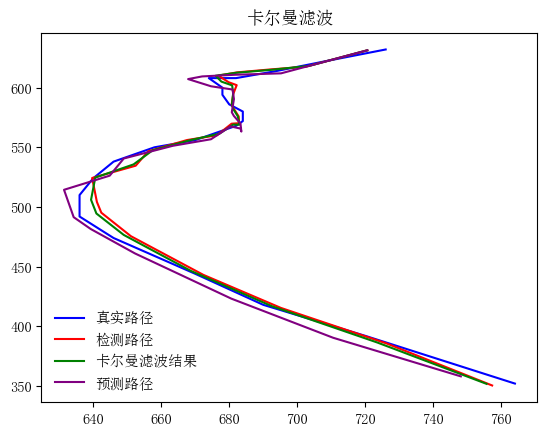

[[-5.4        -0.7       ]
 [-4.58181818 -3.77727273]
 [-1.86696035  0.88942731]
 [ 0.20809969  4.51825545]
 [ 2.00056586  1.98601069]
 [ 1.70377857  1.05589697]
 [ 2.85716089  1.93268741]
 [ 3.16304702  1.44725796]
 [ 0.82221324  0.45770473]
 [-2.79698331  2.02862495]
 [-1.45543694  1.89218001]
 [-1.02643566 -2.58195893]
 [ 1.01894224  0.95448879]
 [ 1.16876094  3.06887511]
 [ 1.10734916 -0.57406179]
 [-1.14701401  0.2172807 ]
 [-0.51547091 -2.48551873]
 [ 5.87618882 -2.3240735 ]
 [ 0.62070854  0.64769776]
 [ 3.37747443 -3.98289077]
 [ 4.95143595  2.53441544]
 [ 2.99332009  2.57928957]
 [-1.17946821  2.29714653]
 [ 2.60174957 -1.21233093]
 [ 3.49455815 -5.54628404]
 [-8.34041064 -0.23971885]]


In [12]:
path = '9.xlsx'
data_A = pd.read_excel(path, header=None)
data_A_x = list(data_A.iloc[::, 0])
data_A_y = list(data_A.iloc[::, 1])
A = np.array(list(zip(data_A_x, data_A_y)))

plt.figure()
plt.plot(data_A_x, data_A_y, 'blue')

# 检测到的路径
path = '10.xlsx'
data_B = pd.read_excel(path, header=None)
data_B_x = list(data_B.iloc[::, 0])
data_B_y = list(data_B.iloc[::, 1])
B = np.array(list(zip(data_B_x, data_B_y)))

plt.plot(data_B_x, data_B_y, 'red')

# 卡尔曼滤波
kf_params_record = np.zeros((len(data_B), 4))
kf_params_p = np.zeros((len(data_B), 4))
t = len(data_B)
kalman_filter_params = kf_init(data_B_x[0], data_B_y[0], 0, 0)
for i in range(t):
    if i == 0:
        kalman_filter_params = kf_init(data_B_x[i], data_B_y[i], 0, 0)  # 初始化
    else:            
        kalman_filter_params.z = np.transpose([data_B_x[i], data_B_y[i]])  # 设置当前时刻的观测位置
        kalman_filter_params = kf_update(kalman_filter_params)  # 卡尔曼滤波
    kf_params_record[i, ::] = np.transpose(kalman_filter_params.x)
    kf_params_p[i, ::] = np.transpose(kalman_filter_params.G)

kf_trace = kf_params_record[::, :2]
kf_trace_1 = kf_params_p[::, :2]

plt.plot(kf_trace[::, 0], kf_trace[::, 1], 'green')
plt.plot(kf_trace_1[1:26, 0], kf_trace_1[1:26, 1], 'purple')
legend = ['真实路径', '检测路径', '卡尔曼滤波结果', '预测路径']
plt.legend(legend, loc="best", frameon=False)
plt.title('卡尔曼滤波')
plt.show()

p = accuracy(kf_trace, A)
print(p)

## 第一部分：时间序列（8分）

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv('Stock_Price.csv')
df.head()


,Date,TWTR,KO,GM
0,2013-11-07,44.900002,30.350573,27.762348
1,2013-11-08,41.650002,30.518206,28.334280
2,2013-11-11,42.900002,30.381044,28.349743
3,2013-11-12,41.900002,30.388666,28.334280
4,2013-11-13,42.599998,30.571535,29.710032


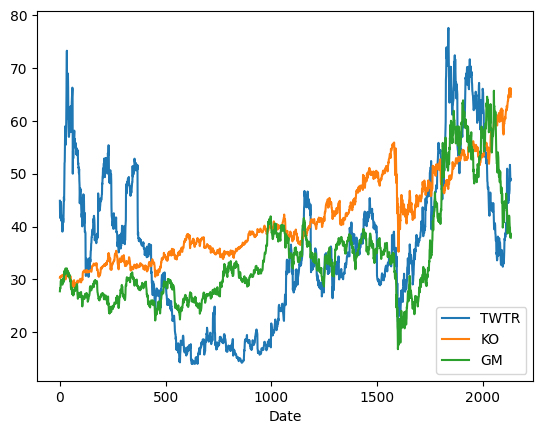

In [4]:
df[['TWTR', 'KO', 'GM']].plot()
plt.xlabel('Date')
plt.show()

1.1 请你结合课上老师讲授的知识、上次作业以及其它查阅得到的知识，对这三支股票的股价时间序列的基本性质与特征（平稳性、周期性等）进行分析，并可以尝试分析三支股票是否有（或在某些局部的时间段有）关联（2分）

In [42]:

# 对序列进行加法成分分解
ts1 = pd.Series(df['TWTR'].values, index=pd.to_datetime(df['Date']))
ts2 = pd.Series(df['KO'].values, index=pd.to_datetime(df['Date']))
ts3 = pd.Series(df['GM'].values, index=pd.to_datetime(df['Date']))
def analyse(ts):
    result = seasonal_decompose(x=ts, model='additive',period=24)
    # 绘制图像
    plt.figure(figsize=(10,8))
    plt.subplot(411)
    plt.plot(ts, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)     
    plt.plot(result.trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(result.seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(result.resid, label='Residuals')
    plt.legend(loc='best')
    plt.show()
    #平稳性
    from statsmodels.tsa.stattools import adfuller

    # 对时间序列进行ADF检验
    result = adfuller(ts)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    # 对时间序列进行差分处理并再次进行ADF检验
    diff_ts = ts.diff().dropna()
    result = adfuller(diff_ts)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    #周期性
    # 绘制时间序列的自相关图和偏自相关图
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(diff_ts, ax=ax[0])
    plot_pacf(diff_ts, ax=ax[1])
    plt.show()


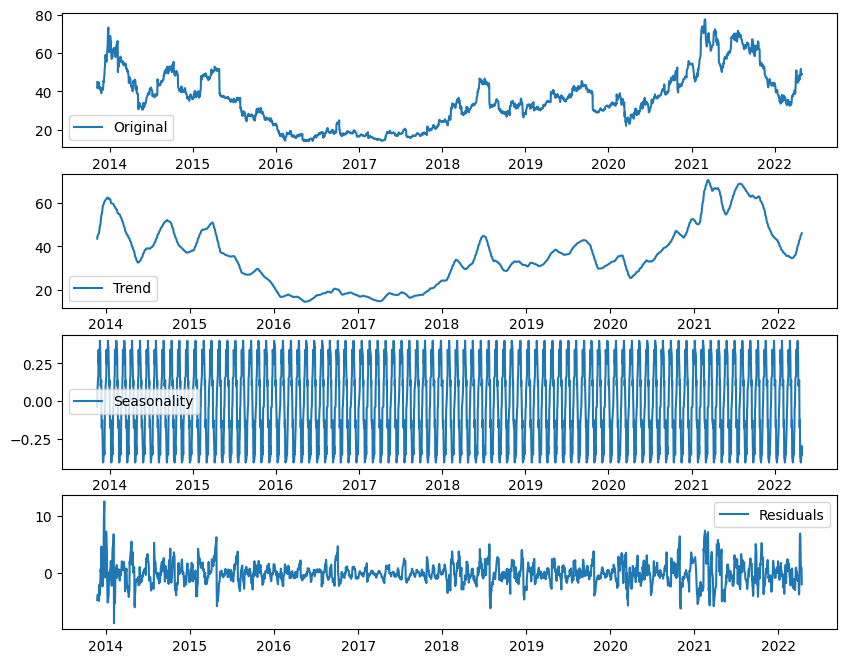

ADF Statistic: -2.107266
p-value: 0.241603
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -11.889919
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


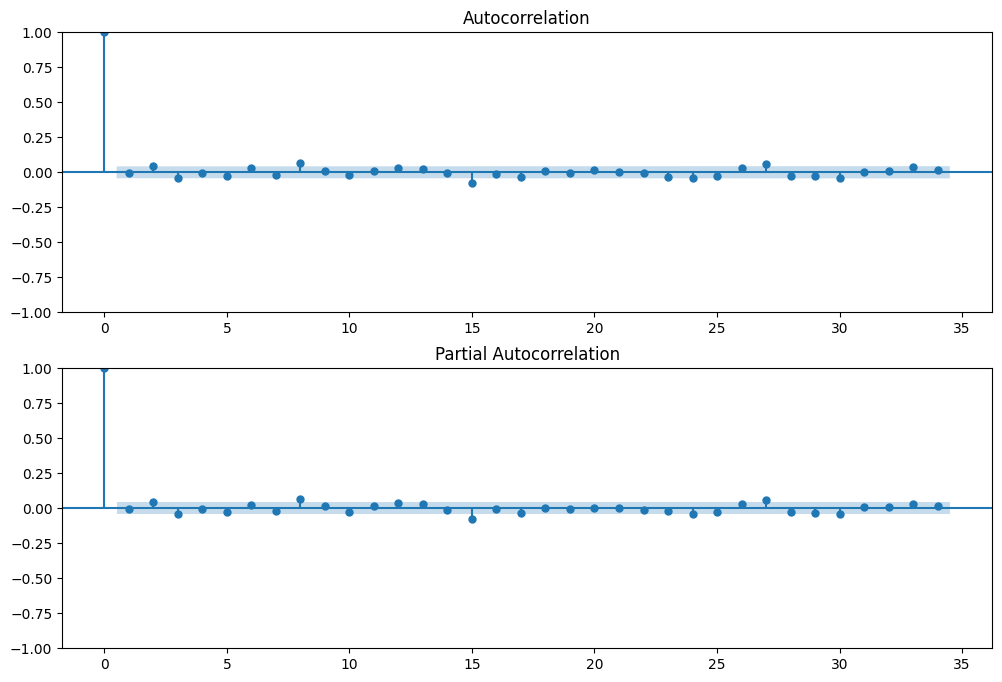

In [19]:
analyse(ts1)

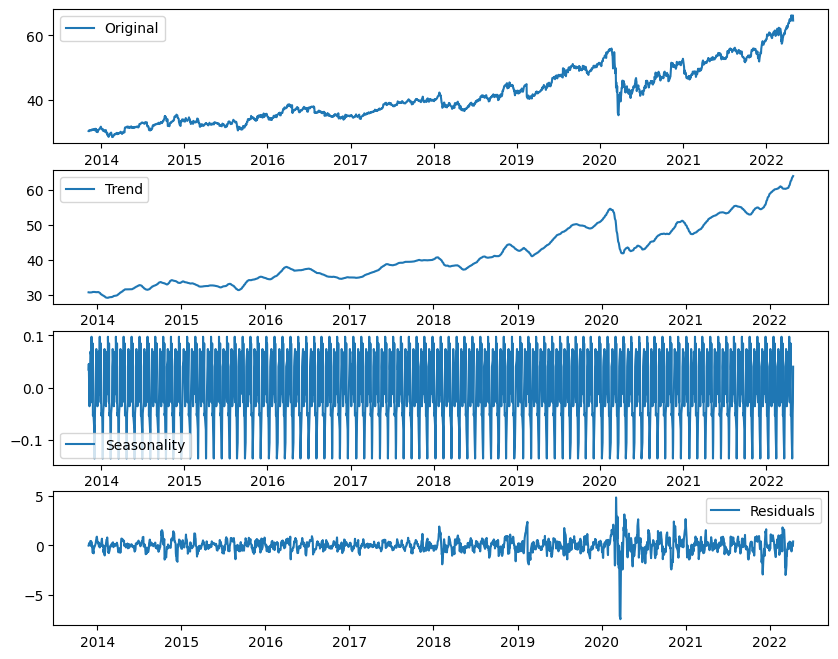

ADF Statistic: 0.040246
p-value: 0.961737
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -14.418779
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


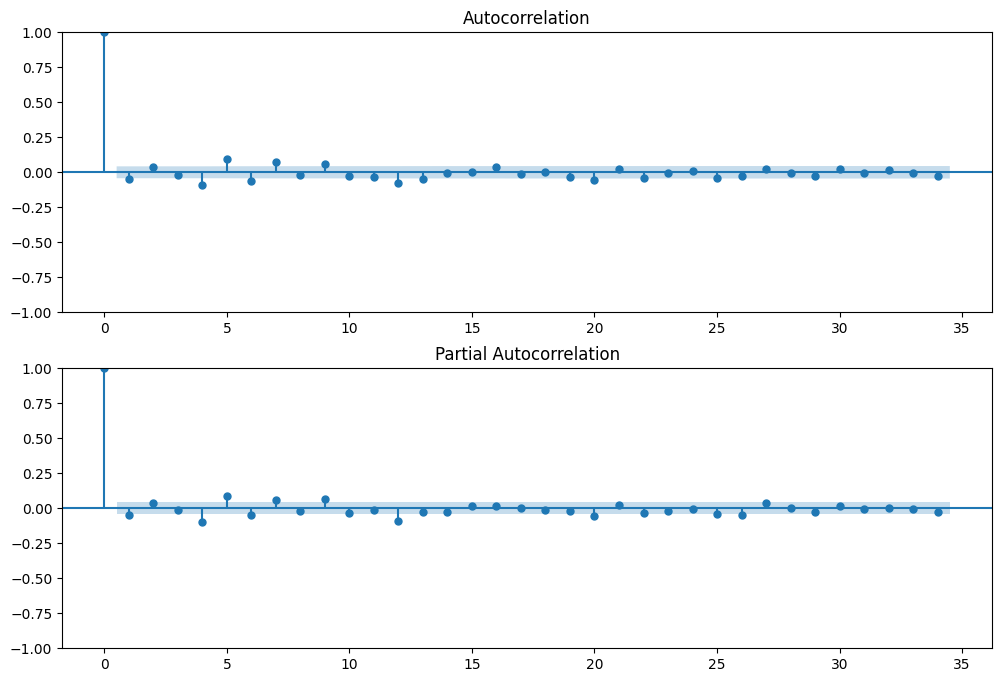

In [20]:
analyse(ts2)

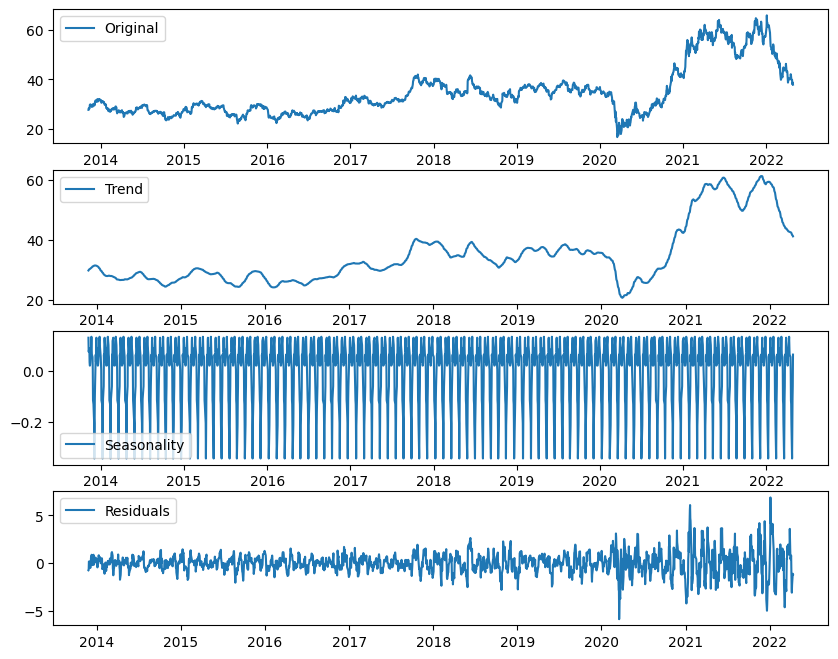

ADF Statistic: -1.746845
p-value: 0.407152
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
ADF Statistic: -10.807824
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


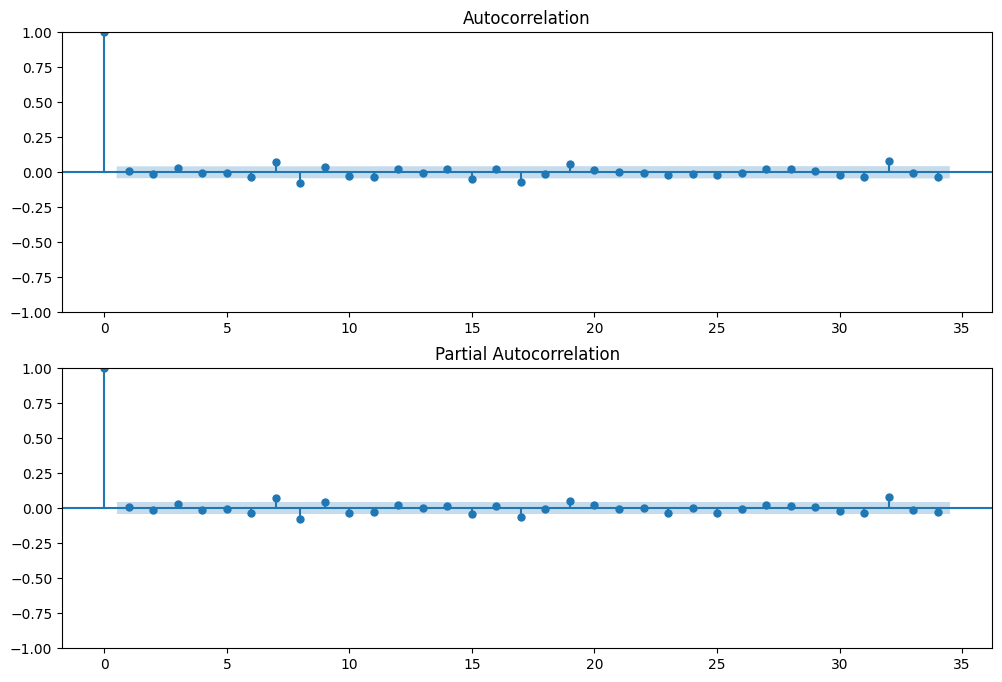

In [21]:
analyse(ts3)

In [48]:
# 协整检验
import statsmodels.api as sm
result = sm.tsa.stattools.coint(ts3[1500:1600], ts2[1500:1600], trend='ct')
print('协整检验结果：', result)

协整检验结果： (-3.394781538119944, 0.12511989265884715, array([-4.48720681, -3.87786858, -3.56858685]))


In [ ]:
#观察图像并多次尝试后发现，三个股票在某些时间段存在关联，比如1500-1600，三个股票都有明显的下跌，可能是股市大环境有所改变

1.2 请你自行发挥，根据你对于时间序列的理解并结合上网查阅资料，给出一些股票时间序列能反映趋势或可以用来预测涨跌的指标（你也可以尝试进行自定义指标），给出指标的定义以及计算指标的代码，并借助该股票数据分析效果（4分）

（没有思路的同学可以尝试计算分析股票的KDJ指标和双均线指标，分析合理即可）

In [51]:
def cal_sma(df):
    # 计算简单移动平均线（SMA）
    sma_5 = df['TWTR'].rolling(window=5).mean()
    sma_10 = df['TWTR'].rolling(window=10).mean()

    # 计算指数移动平均线（EMA）
    ema_5 = df['TWTR'].ewm(span=5, adjust=False).mean()
    ema_10 = df['TWTR'].ewm(span=10, adjust=False).mean()

    # 绘制双均线指标图
    plt.plot(df['Date'], df['TWTR'], label='Close')
    plt.plot(df['Date'], sma_5, label='SMA 5')
    plt.plot(df['Date'], sma_10, label='SMA 10')
    plt.plot(df['Date'], ema_5, label='EMA 5')
    plt.plot(df['Date'], ema_10, label='EMA 10')
    plt.legend()
    plt.show()

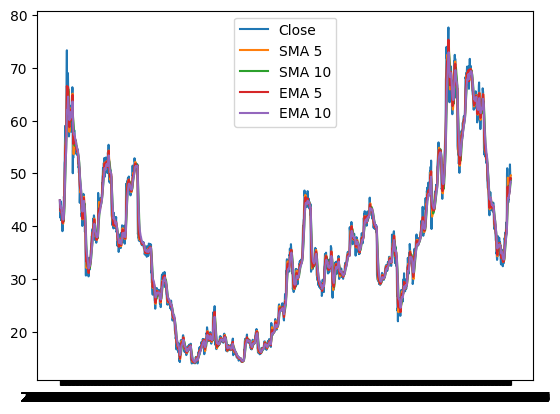

In [52]:
cal_sma(df)

In [55]:
def RSI(df, n=14):
    """
    计算RSI指标
    """
    delta = df['TWTR'].diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    ema_up = up.ewm(com=n-1, adjust=False).mean()
    ema_down = down.ewm(com=n-1, adjust=False).mean()
    rs = ema_up / ema_down
    print(rs.shape)
    return 100 - 100 / (1 + rs)


(2134,)


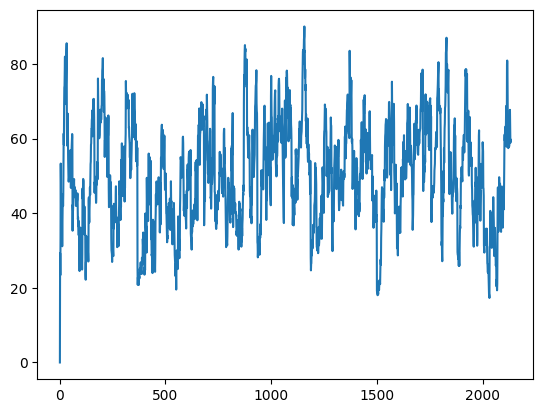

In [57]:
result=RSI(df)
plt.plot(result)

1.3 噪声处理（2分）

example.wav中录制了一段鸟鸣声，但背景中存在很大的噪声，希望能编写一段程序去除噪声。这里采用的是librosa库，有关内容可参考其官方文档https://librosa.org/doc/latest/tutorial.html
<br>（1）绘制音频文件example.wav的图像。
<br>（2）去除音频文件中的噪声。（可使用scipy.signal.lfilter）https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
<br>（3）绘制去除噪声后的音频文件图像。

In [13]:
import librosa
import librosa.display
from scipy import signal
from IPython.display import Audio,display

sr = 16000
e_file='example.wav'
y,sr = librosa.load(e_file, mono=True, sr=sr, offset=0, duration=10)

display(Audio(y,rate=sr))

In [30]:
librosa.display.waveshow(y,sr=sr)

In [19]:
b,a = signal.butter(3,0.05)
zi = signal.lfilter_zi(b,a)
y_clean,_ = signal.lfilter(b,a,y,zi=zi*y[0])
librosa.display.waveshow(y_clean,sr=sr)

In [28]:
def wiener_filter(y, sr):
    # 提取噪声
    noise = y[:sr]
    # 估计噪声的功率谱密度
    noise_psd = np.abs(librosa.stft(noise))**2
    # 估计信号的功率谱密度
    y_psd = np.abs(librosa.stft(y))**2
    # 计算信噪比
    snr = np.mean(y_psd) / np.mean(noise_psd)
    # 计算Wiener滤波器的频率响应
    freq_resp = 1.0 / (1 + snr)
    # 应用Wiener滤波器
    filtered = signal.lfilter([freq_resp], [1, freq_resp - 1], y)
    return filtered
y_filtered = wiener_filter(y, sr)
display(Audio(y_filtered,rate=sr))

## 第二部分：神经网络基础(5分)

2.1补全下列常用的激活函数及其导数,熟记并画出它们的图像（2分），你也可以查阅资料后补充一些其它常用的激活函数（不计分）

In [3]:
def sigmoid(x):
    #todo
    return 1.0/(1.0 + np.exp(-x))

def d_sigmoid(x):
    #todo
    return sigmoid(x) * (1 - sigmoid(x))

def ReLU(x):
    #todo
    return np.maximum(0,x)

def d_ReLU(x):
    #todo
    return np.where(x > 0, 1, 0)
def Tanh(x):
    #todo
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def d_Tanh(x):
    #todo
    return 1 - np.square(np.tanh(x))


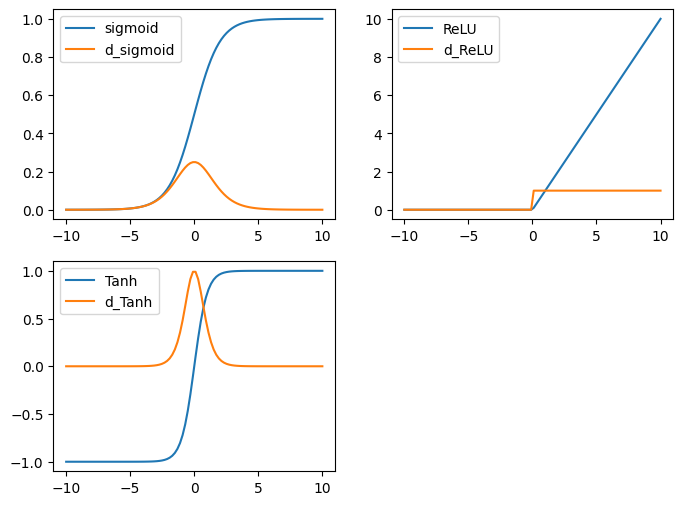

In [4]:
#画出上述常用激活函数与对应导数在区间[-10,10]的图像
#todo
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)

y_sigmoid = sigmoid(x)
y_d_sigmoid = d_sigmoid(x)

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.plot(x, y_sigmoid, label="sigmoid")
plt.plot(x, y_d_sigmoid, label="d_sigmoid")
plt.legend()

y_ReLU = ReLU(x)
y_d_ReLU = d_ReLU(x)

plt.subplot(2, 2, 2)
plt.plot(x, y_ReLU, label="ReLU")
plt.plot(x, y_d_ReLU, label="d_ReLU")
plt.legend()

y_Tanh = Tanh(x)
y_d_Tanh = d_Tanh(x)

plt.subplot(2, 2, 3)
plt.plot(x, y_Tanh, label="Tanh")
plt.plot(x, y_d_Tanh, label="d_Tanh")
plt.legend()

plt.show()

2.2使用反向传播算法，用三次函数拟合sin(x)函数在$[-\pi,\pi]$区间的取值（3分）

In [29]:
import matplotlib.pyplot as plt
import numpy as np
 
import  numpy as np
import math
#在区间等距离散采样
x = np.linspace(-math.pi,math.pi,200)
y = np.sin(x)

In [30]:
#初始化a+b*x+c*x^2+d*x^3中的参数a,b,c,d
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()
learning_rate = 1e-2   #可尝试对比不同的学习率，不计分

In [31]:
for t in range(6000):
    y_pred = a + b*x + c*x**2 + d*x**3
    
    #计算loss（0.5分）
    #todo
    loss = np.mean(np.square(y_pred - y))
 
    print(t, loss)
    
    #反向传播（1分）
    #todo
    n = len(x)
    da,db,dc,dd = 0,0,0,0
    for i in range(n):
        da += (y_pred[i] - y[i])
        db += (y_pred[i] - y[i]) * x[i]
        dc += (y_pred[i] - y[i]) * x[i]**2
        dd += (y_pred[i] - y[i]) * x[i]**3
    da /= n
    db /= n
    dc /= n
    dd /= n
    
    # 更新参数（1分）
    #todo
    a -= learning_rate * da
    b -= learning_rate * db
    c -= learning_rate * dc
    d -= learning_rate * dd
 

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')


0 45.99668222654871
1 10.659806027400572
2 3.682172010472195
3 2.2817917517539725
4 1.9821882851562893
5 1.9023705349088704
6 1.8680698702932503
7 1.8442546064613712
8 1.8235305980774175
9 1.8041191073706955
10 1.7854634562028837
11 1.7673225399743517
12 1.749565085641509
13 1.7321116884949417
14 1.714912313077705
15 1.697934838457182
16 1.681158355040329
17 1.664569029219684
18 1.6481575069801988
19 1.6319172746243031
20 1.6158436219656946
21 1.599932986195291
22 1.584182536561147
23 1.5685899114439301
24 1.5531530518849062
25 1.5378700961619394
26 1.5227393130054583
27 1.5077590592716468
28 1.4929277530960934
29 1.478243856846169
30 1.4637058662759526
31 1.4493123036075315
32 1.4350617130980134
33 1.420952658180376
34 1.406983719601002
35 1.393153494188592
36 1.3794605940232219
37 1.3659036458592004
38 1.35248129070908
39 1.339192183530182
40 1.3260349929765198
41 1.3130084011926129
42 1.3001111036343176
43 1.2873418089072493
44 1.2746992386168294
45 1.2621821272261702
46 1.249789221

515 0.01756441100675057
516 0.01744100867260271
517 0.017318788833682097
518 0.017197740062238884
519 0.017077851041865596
520 0.016959110566404017
521 0.016841507538862665
522 0.016725030970345202
523 0.01660966997898929
524 0.01649541378891598
525 0.01638225172918952
526 0.016270173232787375
527 0.016159167835580492
528 0.016049225175323634
529 0.01594033499065568
530 0.015832487120109765
531 0.01572567150113332
532 0.015619878169117647
533 0.015515097256437217
534 0.015411318991498352
535 0.015308533697797373
536 0.015206731792988044
537 0.01510590378795819
538 0.015006040285915505
539 0.014907131981482297
540 0.014809169659799264
541 0.014712144195638079
542 0.014616046552522728
543 0.014520867781859528
544 0.014426599022075772
545 0.014333231497766852
546 0.014240756518851759
547 0.014149165479737014
548 0.014058449858488786
549 0.01396860121601315
550 0.013879611195244567
551 0.013791471520342229
552 0.013704173995894383
553 0.013617710506130564
554 0.01353207301414154
555 0.0134

1113 0.0046234759205947855
1114 0.00462302776953589
1115 0.004622583711305237
1116 0.004622143708235199
1117 0.004621707723007665
1118 0.0046212757186507485
1119 0.004620847658535559
1120 0.004620423506372997
1121 0.004620003226210565
1122 0.00461958678242923
1123 0.004619174139740291
1124 0.0046187652631822914
1125 0.004618360118117983
1126 0.004617958670231256
1127 0.00461756088552416
1128 0.004617166730313924
1129 0.0046167761712300115
1130 0.004616389175211192
1131 0.004616005709502673
1132 0.0046156257416532015
1133 0.0046152492395122565
1134 0.0046148761712272255
1135 0.0046145065052406176
1136 0.004614140210287318
1137 0.004613777255391841
1138 0.00461341760986565
1139 0.004613061243304437
1140 0.0046127081255854996
1141 0.004612358226865102
1142 0.004612011517575875
1143 0.0046116679684242165
1144 0.0046113275503877485
1145 0.004610990234712797
1146 0.004610655992911856
1147 0.0046103247967611265
1148 0.0046099966182980385
1149 0.004609671429818818
1150 0.00460934920387608
1151

1670 0.0045743862354126
1671 0.004574383287081441
1672 0.004574380364850128
1673 0.004574377468486571
1674 0.004574374597760752
1675 0.004574371752444708
1676 0.004574368932312513
1677 0.004574366137140263
1678 0.004574363366706056
1679 0.004574360620789967
1680 0.004574357899174035
1681 0.004574355201642256
1682 0.004574352527980551
1683 0.004574349877976751
1684 0.004574347251420582
1685 0.004574344648103655
1686 0.004574342067819435
1687 0.004574339510363243
1688 0.004574336975532205
1689 0.004574334463125285
1690 0.004574331972943232
1691 0.004574329504788567
1692 0.00457432705846559
1693 0.0045743246337803314
1694 0.004574322230540566
1695 0.004574319848555782
1696 0.004574317487637161
1697 0.0045743151475975885
1698 0.004574312828251599
1699 0.004574310529415393
1700 0.004574308250906814
1701 0.004574305992545322
1702 0.004574303754152004
1703 0.004574301535549522
1704 0.0045742993365621475
1705 0.004574297157015697
1706 0.004574294996737545
1707 0.004574292855556623
1708 0.00457

2268 0.004574053612087719
2269 0.004574053596887957
2270 0.0045740535818205655
2271 0.004574053566884391
2272 0.004574053552078289
2273 0.004574053537401126
2274 0.00457405352285177
2275 0.004574053508429115
2276 0.0045740534941320484
2277 0.004574053479959479
2278 0.004574053465910317
2279 0.004574053451983493
2280 0.0045740534381779295
2281 0.00457405342449258
2282 0.004574053410926383
2283 0.004574053397478309
2284 0.0045740533841473275
2285 0.004574053370932408
2286 0.00457405335783255
2287 0.0045740533448467395
2288 0.004574053331973987
2289 0.004574053319213307
2290 0.00457405330656372
2291 0.004574053294024259
2292 0.00457405328159396
2293 0.004574053269271871
2294 0.004574053257057054
2295 0.004574053244948567
2296 0.0045740532329454865
2297 0.004574053221046892
2298 0.0045740532092518734
2299 0.004574053197559524
2300 0.004574053185968954
2301 0.004574053174479272
2302 0.004574053163089593
2303 0.004574053151799061
2304 0.004574053140606798
2305 0.004574053129511946
2306 0.004

2779 0.004574051884347391
2780 0.004574051884170741
2781 0.004574051883995622
2782 0.004574051883822016
2783 0.004574051883649918
2784 0.004574051883479307
2785 0.004574051883310174
2786 0.004574051883142506
2787 0.00457405188297629
2788 0.0045740518828115105
2789 0.004574051882648158
2790 0.004574051882486222
2791 0.004574051882325689
2792 0.004574051882166543
2793 0.004574051882008774
2794 0.004574051881852373
2795 0.004574051881697326
2796 0.004574051881543622
2797 0.004574051881391246
2798 0.004574051881240191
2799 0.004574051881090446
2800 0.004574051880941993
2801 0.004574051880794825
2802 0.004574051880648932
2803 0.004574051880504301
2804 0.004574051880360926
2805 0.00457405188021879
2806 0.004574051880077884
2807 0.0045740518799382
2808 0.004574051879799724
2809 0.004574051879662445
2810 0.0045740518795263545
2811 0.004574051879391445
2812 0.004574051879257703
2813 0.0045740518791251164
2814 0.004574051878993676
2815 0.004574051878863375
2816 0.004574051878734207
2817 0.004574

3395 0.0045740518640284685
3396 0.004574051864027628
3397 0.004574051864026793
3398 0.004574051864025968
3399 0.004574051864025152
3400 0.004574051864024337
3401 0.004574051864023532
3402 0.004574051864022736
3403 0.004574051864021943
3404 0.00457405186402116
3405 0.004574051864020384
3406 0.004574051864019613
3407 0.0045740518640188495
3408 0.004574051864018091
3409 0.004574051864017342
3410 0.004574051864016597
3411 0.00457405186401586
3412 0.00457405186401513
3413 0.004574051864014401
3414 0.004574051864013684
3415 0.004574051864012974
3416 0.004574051864012265
3417 0.0045740518640115645
3418 0.004574051864010868
3419 0.004574051864010182
3420 0.004574051864009501
3421 0.004574051864008824
3422 0.004574051864008153
3423 0.004574051864007487
3424 0.004574051864006825
3425 0.0045740518640061765
3426 0.004574051864005529
3427 0.004574051864004886
3428 0.004574051864004249
3429 0.004574051864003618
3430 0.004574051864002989
3431 0.004574051864002374
3432 0.00457405186400176
3433 0.00457

3992 0.004574051863931682
3993 0.00457405186393168
3994 0.0045740518639316744
3995 0.004574051863931668
3996 0.004574051863931663
3997 0.004574051863931659
3998 0.0045740518639316545
3999 0.0045740518639316476
4000 0.004574051863931643
4001 0.0045740518639316415
4002 0.004574051863931639
4003 0.004574051863931631
4004 0.004574051863931625
4005 0.004574051863931624
4006 0.00457405186393162
4007 0.004574051863931615
4008 0.004574051863931611
4009 0.004574051863931606
4010 0.004574051863931604
4011 0.004574051863931599
4012 0.004574051863931594
4013 0.004574051863931589
4014 0.004574051863931585
4015 0.004574051863931582
4016 0.004574051863931578
4017 0.0045740518639315764
4018 0.004574051863931571
4019 0.004574051863931569
4020 0.004574051863931562
4021 0.004574051863931558
4022 0.004574051863931554
4023 0.004574051863931552
4024 0.004574051863931548
4025 0.0045740518639315435
4026 0.004574051863931541
4027 0.004574051863931538
4028 0.004574051863931534
4029 0.0045740518639315305
4030 0.

4508 0.0045740518639311376
4509 0.004574051863931139
4510 0.0045740518639311376
4511 0.004574051863931136
4512 0.004574051863931139
4513 0.004574051863931136
4514 0.004574051863931142
4515 0.0045740518639311376
4516 0.0045740518639311376
4517 0.004574051863931136
4518 0.004574051863931136
4519 0.004574051863931136
4520 0.004574051863931135
4521 0.004574051863931134
4522 0.004574051863931138
4523 0.004574051863931136
4524 0.004574051863931135
4525 0.004574051863931138
4526 0.004574051863931137
4527 0.004574051863931136
4528 0.004574051863931135
4529 0.0045740518639311376
4530 0.004574051863931136
4531 0.0045740518639311376
4532 0.004574051863931137
4533 0.004574051863931139
4534 0.004574051863931136
4535 0.004574051863931136
4536 0.004574051863931136
4537 0.004574051863931134
4538 0.004574051863931136
4539 0.0045740518639311376
4540 0.004574051863931137
4541 0.004574051863931133
4542 0.004574051863931136
4543 0.004574051863931134
4544 0.004574051863931136
4545 0.004574051863931135
4546 

5219 0.00457405186393113
5220 0.004574051863931132
5221 0.0045740518639311315
5222 0.00457405186393113
5223 0.004574051863931129
5224 0.00457405186393113
5225 0.00457405186393113
5226 0.00457405186393113
5227 0.00457405186393113
5228 0.004574051863931129
5229 0.0045740518639311315
5230 0.004574051863931129
5231 0.0045740518639311315
5232 0.00457405186393113
5233 0.004574051863931128
5234 0.004574051863931136
5235 0.00457405186393113
5236 0.004574051863931129
5237 0.00457405186393113
5238 0.004574051863931134
5239 0.004574051863931131
5240 0.00457405186393113
5241 0.004574051863931129
5242 0.0045740518639311315
5243 0.00457405186393113
5244 0.00457405186393113
5245 0.004574051863931129
5246 0.004574051863931132
5247 0.0045740518639311315
5248 0.00457405186393113
5249 0.0045740518639311315
5250 0.004574051863931133
5251 0.004574051863931132
5252 0.004574051863931132
5253 0.004574051863931129
5254 0.004574051863931132
5255 0.0045740518639311315
5256 0.0045740518639311315
5257 0.0045740518

5743 0.00457405186393113
5744 0.0045740518639311315
5745 0.004574051863931128
5746 0.0045740518639311315
5747 0.00457405186393113
5748 0.004574051863931131
5749 0.00457405186393113
5750 0.00457405186393113
5751 0.004574051863931129
5752 0.00457405186393113
5753 0.00457405186393113
5754 0.0045740518639311315
5755 0.004574051863931132
5756 0.004574051863931128
5757 0.004574051863931129
5758 0.0045740518639311315
5759 0.0045740518639311315
5760 0.0045740518639311315
5761 0.004574051863931132
5762 0.004574051863931131
5763 0.004574051863931129
5764 0.004574051863931132
5765 0.004574051863931128
5766 0.0045740518639311315
5767 0.0045740518639311315
5768 0.00457405186393113
5769 0.004574051863931133
5770 0.004574051863931128
5771 0.0045740518639311315
5772 0.0045740518639311315
5773 0.004574051863931131
5774 0.00457405186393113
5775 0.004574051863931129
5776 0.00457405186393113
5777 0.0045740518639311315
5778 0.00457405186393113
5779 0.0045740518639311315
5780 0.0045740518639311315
5781 0.00

画出得到的三次函数与sinx在$[-\pi,\pi]$区间内的图像(0.5分)

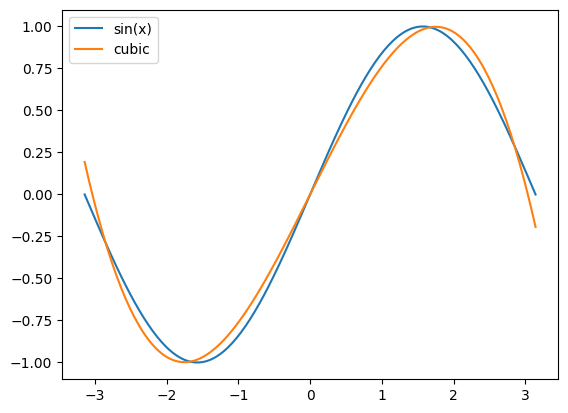

In [32]:
#todo
y_pred = a + b*x + c*x**2 + d*x**3
plt.plot(x, y, label="sin(x)")
plt.plot(x, y_pred, label="cubic")
plt.legend()
plt.show()